In [8]:
import os
import re
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 6)

In [58]:
fitnesses_file = '../era-outs/20171004-spea-ml-1m-out/best_ind_binaries/archive-u1-run3/archive_fitnesses.log'
#fitnesses_file = '../../ERA/yelp-out/best_ind_binaries/archive-u1-run0/archive_fitnesses.log'

In [59]:
lines = !grep "\[" {fitnesses_file}
lines

['Fitness: [0.045235551234907724 0.9145518090570999 0.9002509034137991]',
 'Fitness: [0.11335787267416624 0.8119045874211466 0.728727114230095]',
 'Fitness: [0.1047140386361706 0.8593530415261863 0.7540301571741902]',
 'Fitness: [0.08768724820116225 0.8540102908025983 0.8218096854633554]',
 'Fitness: [0.002918393966499767 0.9742530787266529 0.9495103665550324]',
 'Fitness: [0.08453352918260862 0.9128413870769465 0.7981340669700574]',
 'Fitness: [0.045316215933791384 0.9265677756153624 0.8784578399315763]',
 'Fitness: [0.06594963474792617 0.8862031308062696 0.8751430160231147]',
 'Fitness: [0.06594963474792617 0.8862031308062696 0.8751430160231147]',
 'Fitness: [0.020020941372987072 0.9519286579701105 0.9296350339257332]']

In [60]:
def extract_fitness_values(line):
    value_strings = line[line.find('[') + 1:line.find(']')].split()
    return tuple(float(s) for s in value_strings)

fitness_values = [extract_fitness_values(line) for line in lines]
fitness_values

[(0.045235551234907724, 0.9145518090570999, 0.9002509034137991),
 (0.11335787267416624, 0.8119045874211466, 0.728727114230095),
 (0.1047140386361706, 0.8593530415261863, 0.7540301571741902),
 (0.08768724820116225, 0.8540102908025983, 0.8218096854633554),
 (0.002918393966499767, 0.9742530787266529, 0.9495103665550324),
 (0.08453352918260862, 0.9128413870769465, 0.7981340669700574),
 (0.045316215933791384, 0.9265677756153624, 0.8784578399315763),
 (0.06594963474792617, 0.8862031308062696, 0.8751430160231147),
 (0.06594963474792617, 0.8862031308062696, 0.8751430160231147),
 (0.020020941372987072, 0.9519286579701105, 0.9296350339257332)]

In [61]:
frame = pd.DataFrame.from_records(fitness_values, columns=('map', 'epc', 'eild'))
frame

,map,epc,eild
0,0.045236,0.914552,0.900251
1,0.113358,0.811905,0.728727
2,0.104714,0.859353,0.754030
3,0.087687,0.854010,0.821810
4,0.002918,0.974253,0.949510
5,0.084534,0.912841,0.798134
6,0.045316,0.926568,0.878458
7,0.065950,0.886203,0.875143
8,0.065950,0.886203,0.875143
9,0.020021,0.951929,0.929635


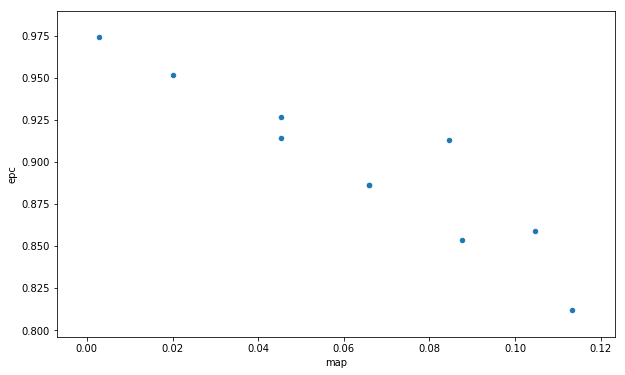

In [62]:
frame.plot.scatter('map', 'epc')

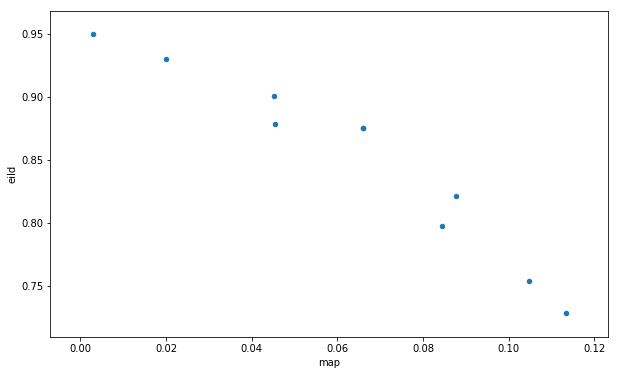

In [65]:
frame.plot.scatter('map', 'eild')

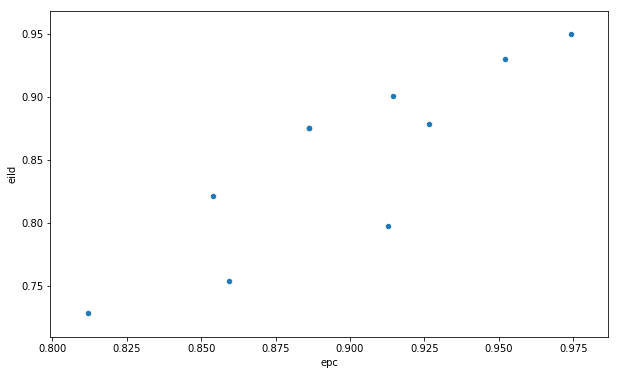

In [63]:
frame.plot.scatter('epc', 'eild')

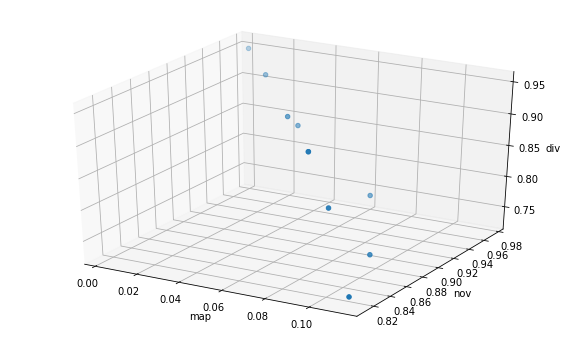

In [64]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(frame.map, frame.epc, frame.eild)
threedee.set_xlabel('map')
threedee.set_ylabel('nov')
threedee.set_zlabel('div')
plt.savefig('3d_front.png')